### Pareto Distribution Demonstration Via Random Trading

In order to see if in a free market society the money of capable traders acrue in the hands of less and less people, we will create a simulation in which only people with money can trade with one another. In this simulation we will define a trade to be an randomized event in which 2 traders both have a 50/50 chance of winning \$10. Both traders, if they have the money, will put in \$5 of their money in a shared pot. Based of a coin flip, the winning trader will get the total money put into the pot.

### Simulation Code

In [1]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# logging
def initDataLogging():
    with open("results.csv", "w") as f:
        f.write(f"sim_id,last_person_id,last_person_bal,num_trades\n")

    with open("trading_log.csv", "w") as f:
        f.write("first_person,second_person,first_person_gain\n")
initDataLogging()

In [3]:
class Person:
    def __init__(self, money, id):
        self.money = money
        self.id = id
    
    def __repr__(self):
        return f"Person_{self.id} has ${self.money}"

In [4]:
# i realize this is entirely very silly, but its fun
# True = Heads, False = Tails 
class Coin:
    def flip(self):
        return random.choice([True, False])

In [5]:
class Simulation:
    def __init__(self, start_money, trade_amount, num_population, sim_id, logTradesVerbose):
        self.no_money_population = []
        self.population = []
        self.trade_log = []
        self.start_money = start_money
        self.trade_amount = trade_amount
        self.num_population = num_population
        self.coin = Coin() # coin used for all-in trading based on probability
        self.sim_id = sim_id # used for naming text file to save results in 
        # plotting and data tracking data attributes
        self.plot_time = 0
        self.plot_time_log = []
        self.plot_pop_count_log = []
        self.plot_no_money_count_log = []
        self.logTradesVerbose = logTradesVerbose # T or F
        self.log_trade_count = 0
        
    def generatePopulation(self):
        # generate people all starting with the same amount of money
        for id in range(self.num_population):
            self.population.append(Person(self.start_money, id))
    
    # remove trader with no money from trading population
    def removeTrader(self, id):
        for person in self.population:
            if person.id == id:
                person_copy = person
                self.population.remove(person)
        self.no_money_population.append(person_copy)  
        
    def trade(self):
        # Requires at least 2 people in population who have money to trade with one another.
        # select 2 different traders with money
        x = random.choice(self.population)
        y = random.choice(self.population)
        while(y == x):
            y = random.choice(self.population)
        # trade
        if self.coin.flip():
            x.money += self.trade_amount
            y.money -= self.trade_amount
            if(self.logTradesVerbose):
                # person x, person y, person x gains (+ gain, - loss)
                # therefore person y loses the same amount
                self.trade_log.append(f"{x.id},{y.id},{self.trade_amount}")
                self.log_trade_count += 1
            else:
                self.log_trade_count += 1
            if(y.money == 0):
                self.removeTrader(y.id)
        else:
            y.money += self.trade_amount
            x.money -= self.trade_amount
            if(self.logTradesVerbose):
                # person x, person y, person x gains (+ gain, - loss)
                self.trade_log.append(f"{y.id},{x.id},{self.trade_amount}")
                self.log_trade_count += 1
            else:
                self.log_trade_count += 1
            if(x.money == 0):
                self.removeTrader(x.id)

    # create trade cycles
    def tradeCycle(self):
        if(len(self.population) >= 2):
            self.trade()
            return True
        else:
            return False
    
    def writeStatsToFile(self):
        # final sim results in CSV format
        with open("results.csv", "a") as f:
            # simulation id, last person id, last person balance, number of trades ran
            f.write(f"{self.sim_id},{self.population[0].id},{self.population[0].money},{self.log_trade_count}\n")

        # trading log in CSV format
        with open("trading_log.csv", "a") as f:
            for trade in self.trade_log:
                f.write(f"{trade}\n")
            
        
    def plotPopulationVsTime(self):
        plt.plot(self.plot_time_log, self.plot_pop_count_log, 'ko', label="Trader Population")
        plt.plot(self.plot_time_log, self.plot_no_money_count_log, 'bo', label="No Money Population")
        plt.legend()
        plt.title("Population Number vs. Time ")
        plt.xlabel("Time")
        plt.ylabel("Population Count")
        
    def plotIncrementData(self):
        self.plot_time_log.append(self.plot_time)
        self.plot_time += 1
        self.plot_pop_count_log.append(len(self.population))
        self.plot_no_money_count_log.append(len(self.no_money_population))
    
    def main(self, show_plot=True, save_results=True):
        # generate population
        self.generatePopulation()
        # commence trading
        while(self.tradeCycle()):
            self.plotIncrementData()
        
        if show_plot: self.plotPopulationVsTime()
        if save_results: self.writeStatsToFile()

### Running Simulation with Adjustable Variables

Let's try $100$ traders with \$2 available to trade with and each time they'll wager 1 dollar.

In [6]:
start_money = 2 # the amount each trader starts with
trade_amount = 1 # how much a trader will "trade" with (either lose it or win 100% of what you put in)
num_population = 100 # number of traders in the environment
simulation_id = 0

SimId:0 took 0.03259396553039551 seconds


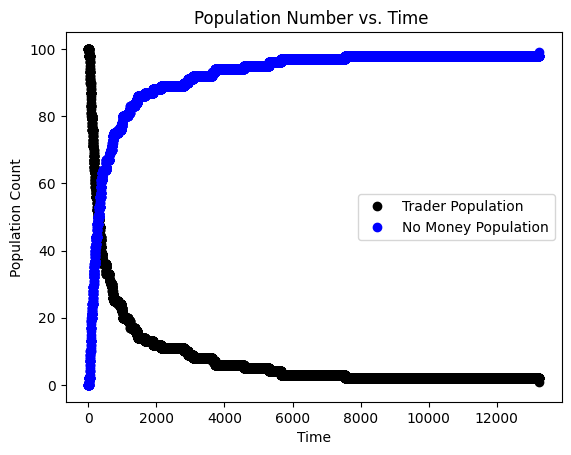

In [7]:
startTime = time.time()
sim = Simulation(start_money, trade_amount, num_population, simulation_id, False)
sim.main(show_plot=True, save_results=False)
print(f"SimId:{simulation_id} took {time.time() - startTime} seconds")

## What is the average number of trades needed for all the money to accrue to a single person if there was 100 people and you all start with 2 chances (start with $2 and have to trade $1)?

In [8]:
N = 500
start_money = 2 # the amount each trader starts with
trade_amount = 1 # how much a trader will "trade" with (either lose it or win 100% of what you put in)
num_population = 100 # number of traders in the environment

initDataLogging()
for i in range(N):
    simulation_id = i
    sim = Simulation(start_money, trade_amount, num_population, simulation_id, logTradesVerbose=False)
    sim.main(show_plot=False, save_results=True)

In [13]:
results = pd.read_csv("results.csv")
num_trades = results.loc[:,"num_trades"]
print("average number of trades:", np.average(num_trades))
print("median number of trades:",np.median(num_trades))

average number of trades: 20348.14
median number of trades: 18125.5


Text(0.5, 1.0, 'Trades till Completion vs. Number of Simulations')

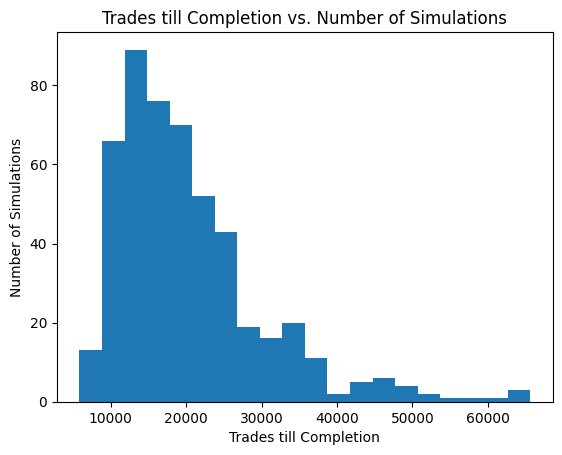

In [10]:
plt.hist(num_trades, bins=20)
plt.xlabel("Trades till Completion")
plt.ylabel("Number of Simulations")
plt.title("Trades till Completion vs. Number of Simulations")